In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airfoil-selfnoise-dataset/AirfoilSelfNoise.csv


In [2]:
data = pd.read_csv('/kaggle/input/airfoil-selfnoise-dataset/AirfoilSelfNoise.csv')
data.head(5)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
data.info

<bound method DataFrame.info of          f  alpha       c  U_infinity     delta     SSPL
0      800    0.0  0.3048        71.3  0.002663  126.201
1     1000    0.0  0.3048        71.3  0.002663  125.201
2     1250    0.0  0.3048        71.3  0.002663  125.951
3     1600    0.0  0.3048        71.3  0.002663  127.591
4     2000    0.0  0.3048        71.3  0.002663  127.461
...    ...    ...     ...         ...       ...      ...
1498  2500   15.6  0.1016        39.6  0.052849  110.264
1499  3150   15.6  0.1016        39.6  0.052849  109.254
1500  4000   15.6  0.1016        39.6  0.052849  106.604
1501  5000   15.6  0.1016        39.6  0.052849  106.224
1502  6300   15.6  0.1016        39.6  0.052849  104.204

[1503 rows x 6 columns]>

In [4]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 63.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


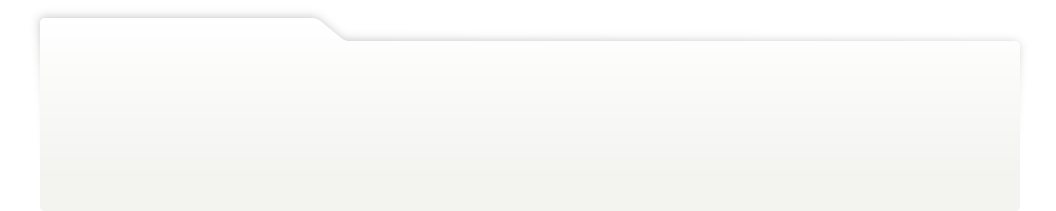
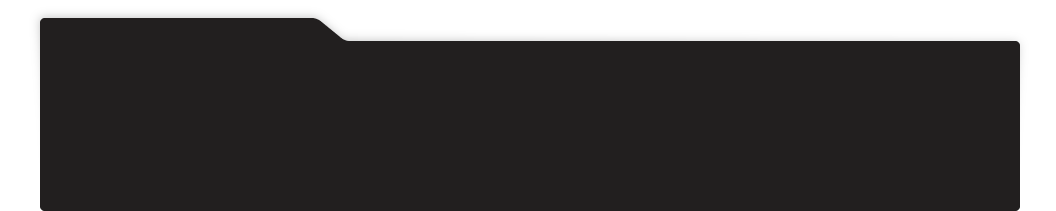
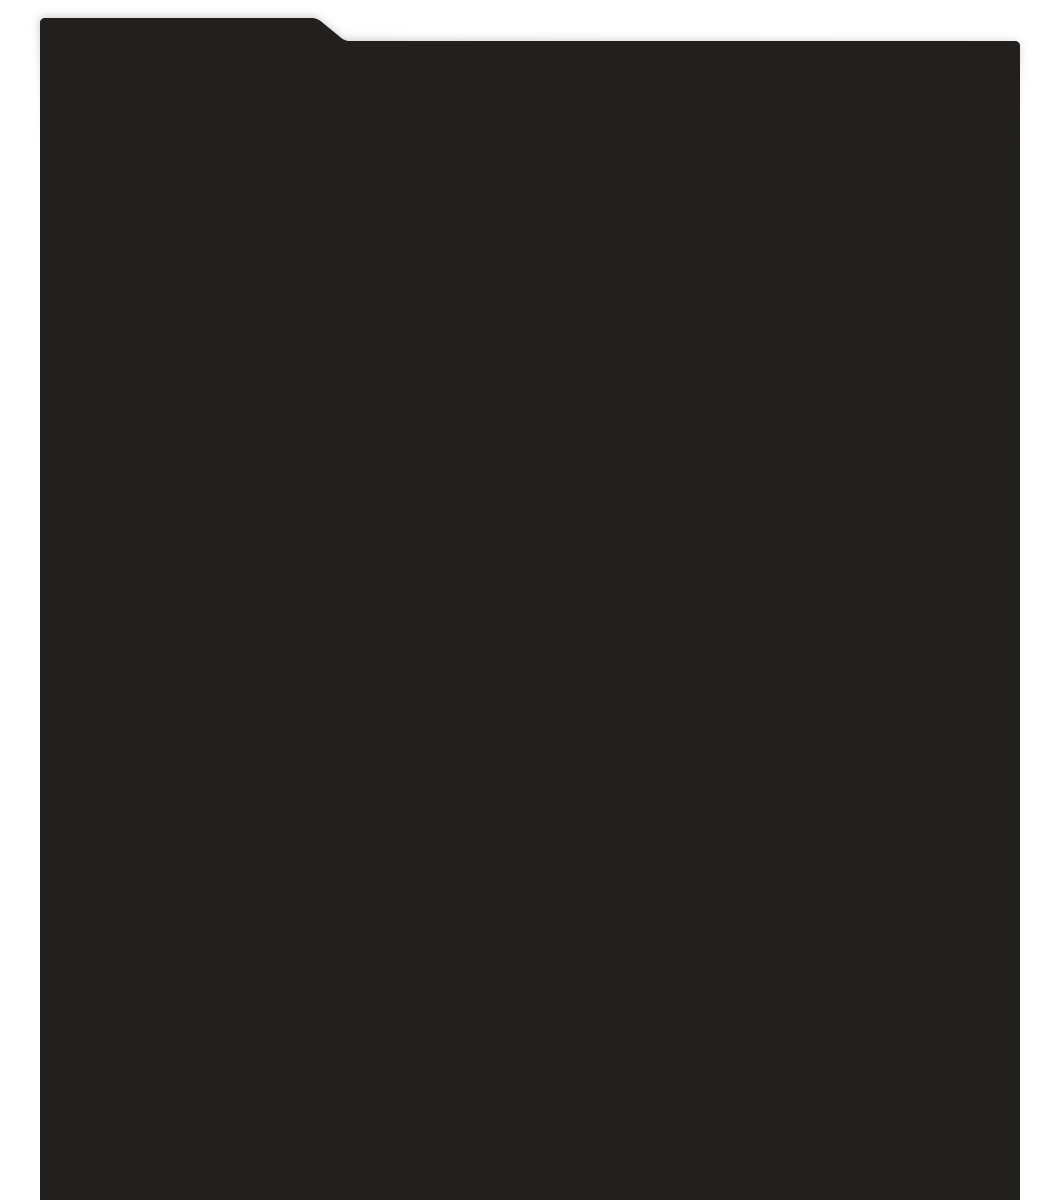
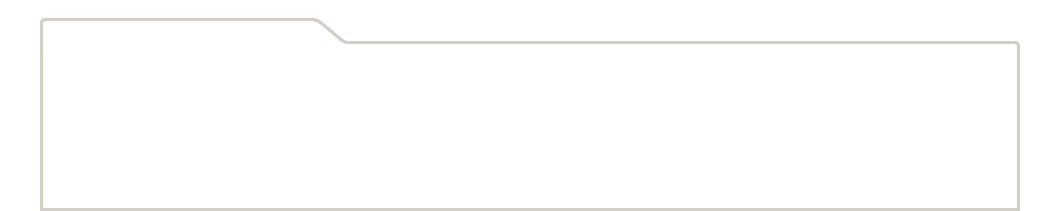
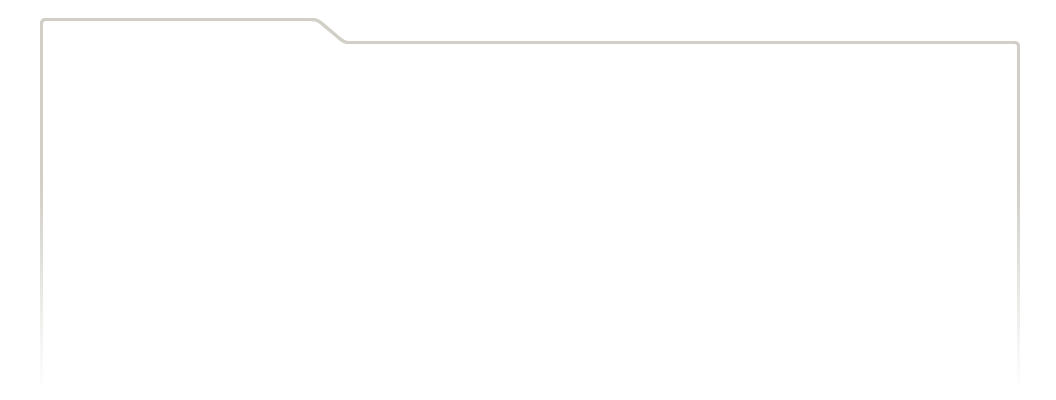
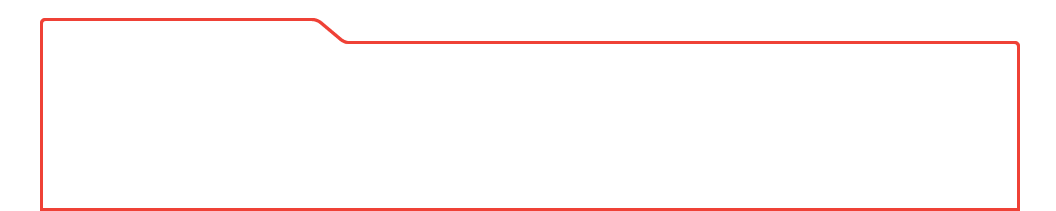
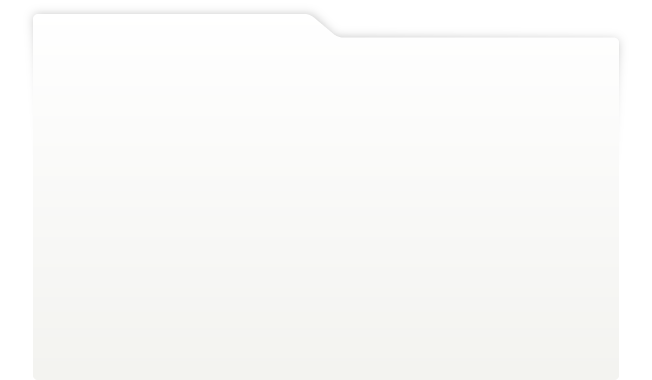
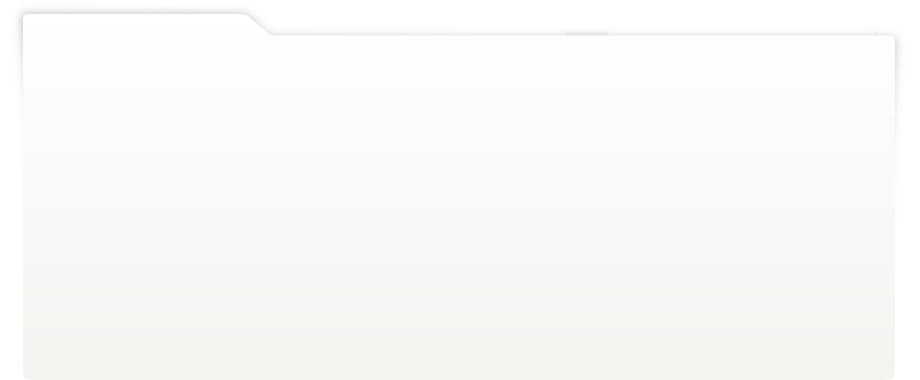
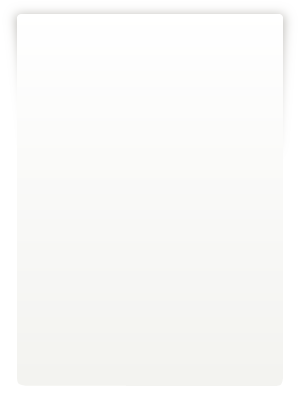
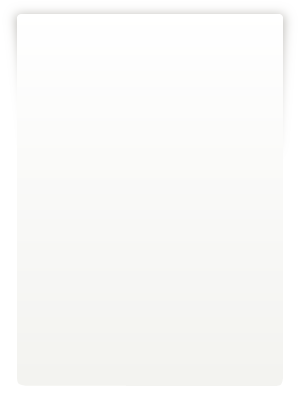
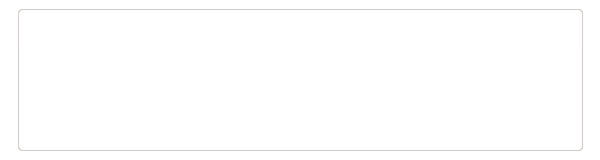
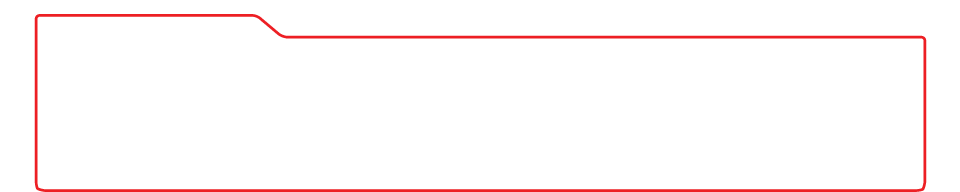
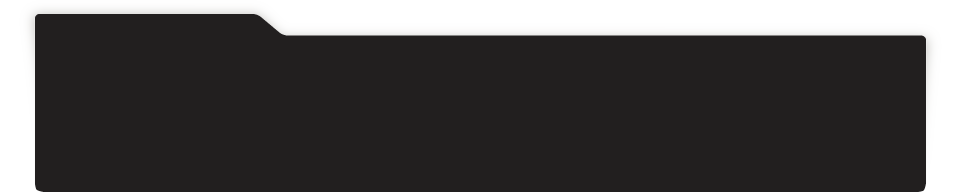
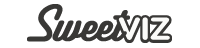
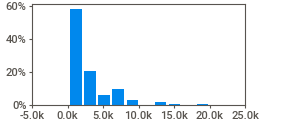
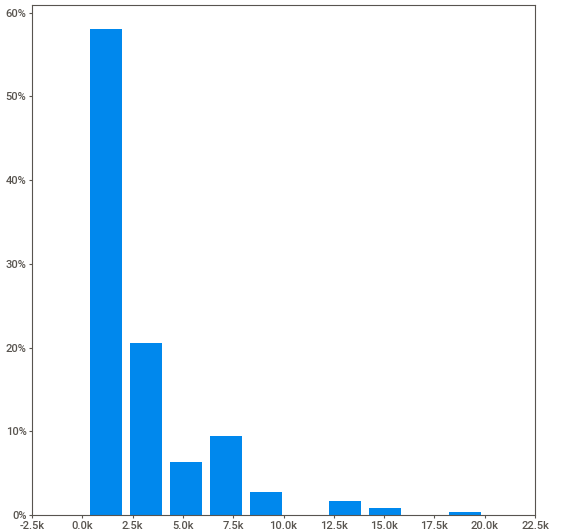
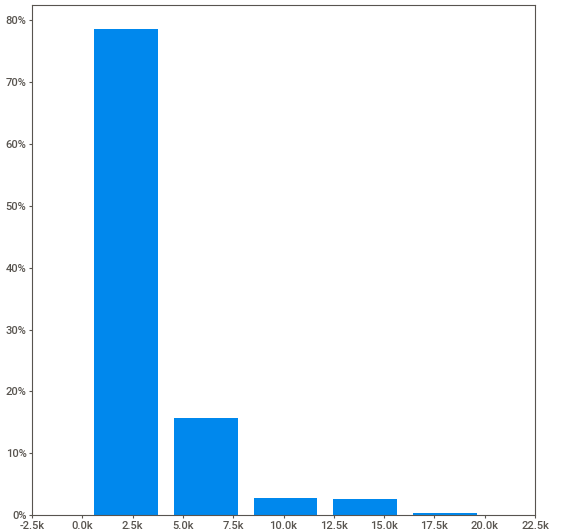
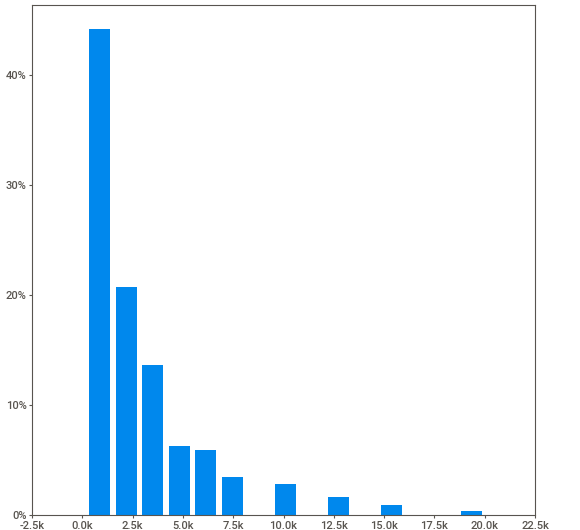
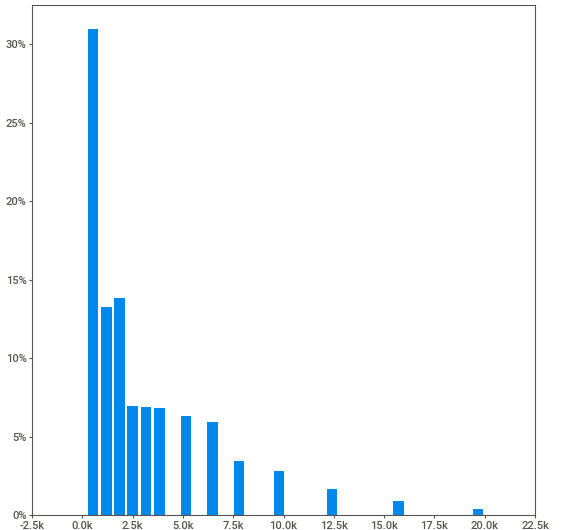
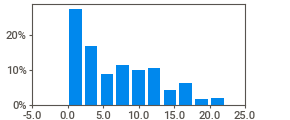
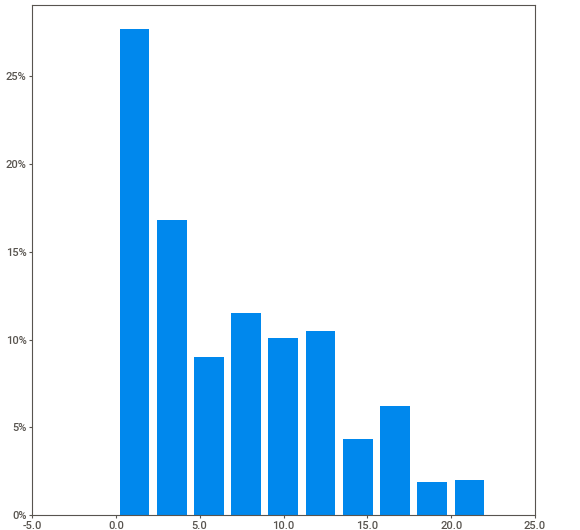
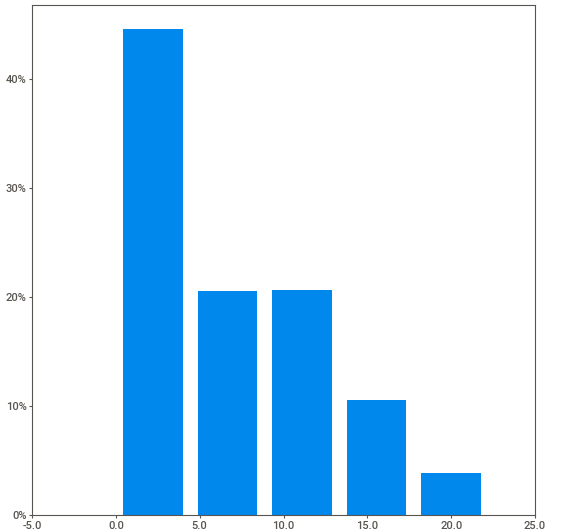
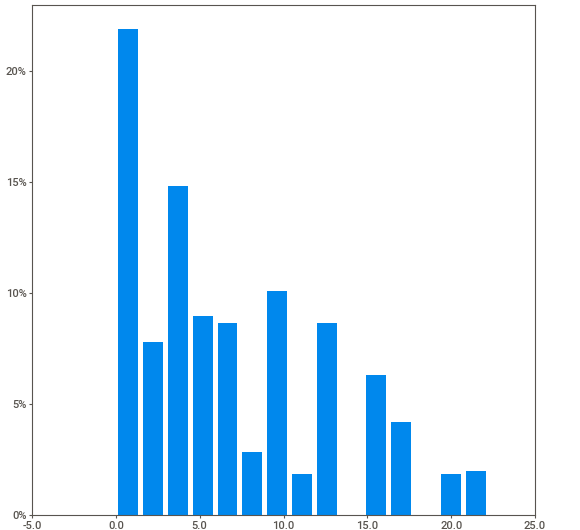
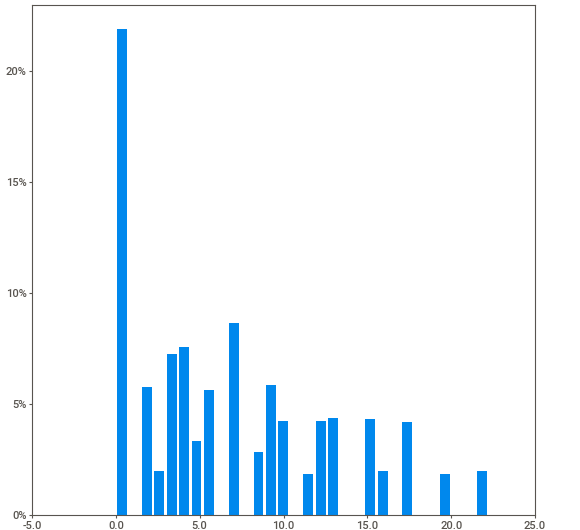
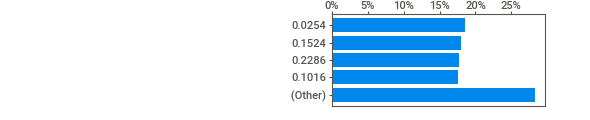
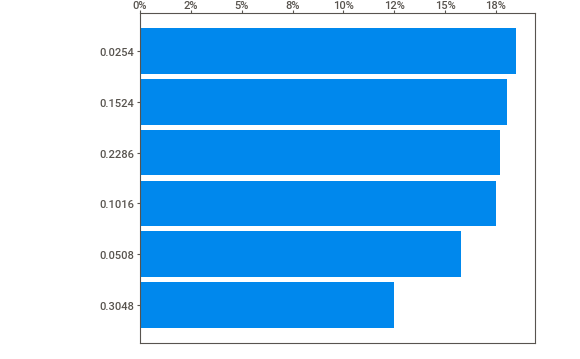
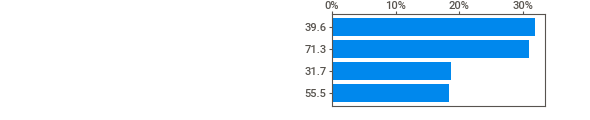
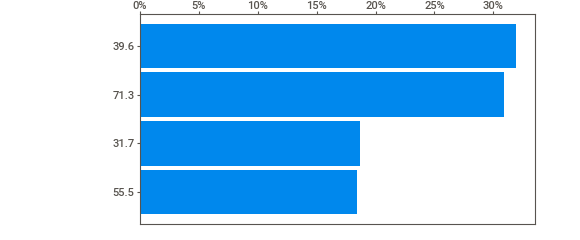
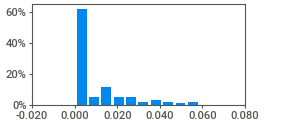
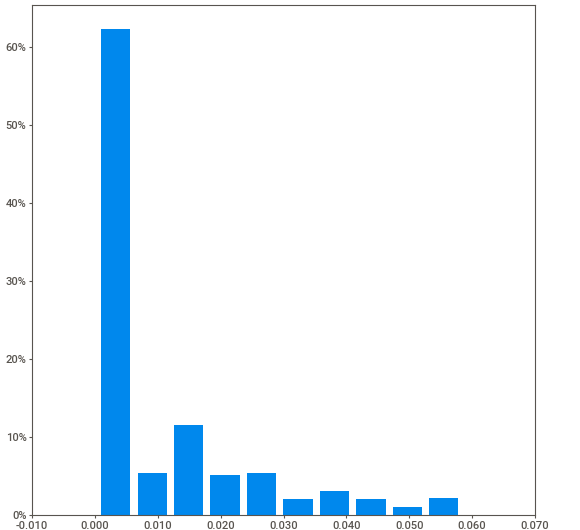
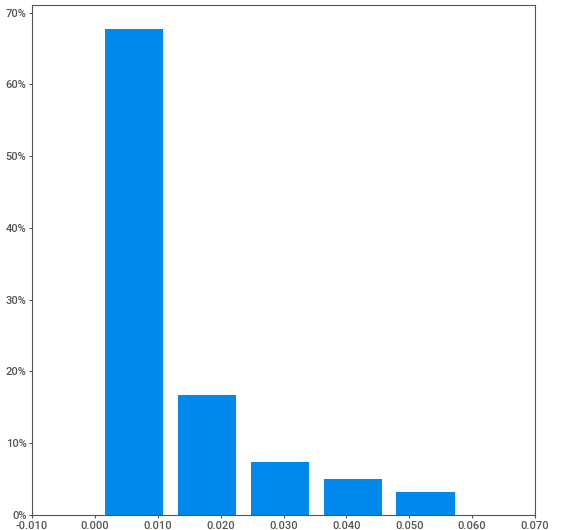
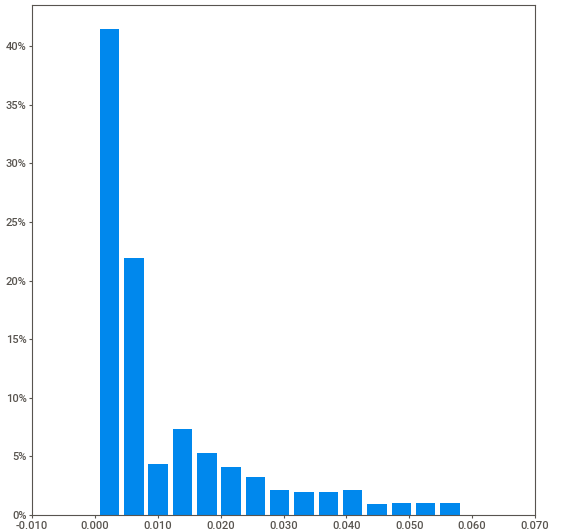
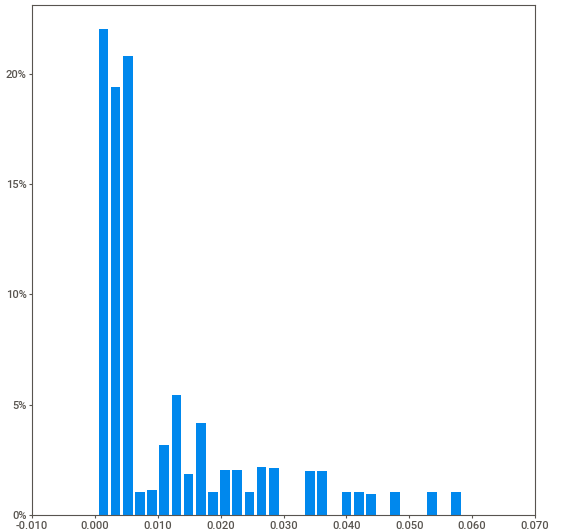
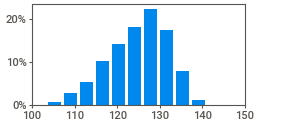
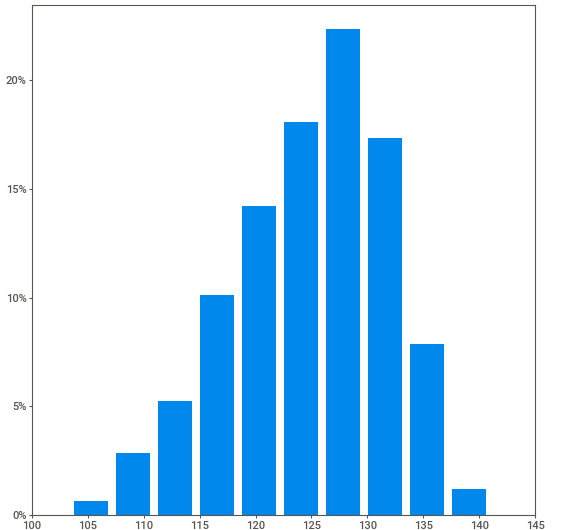
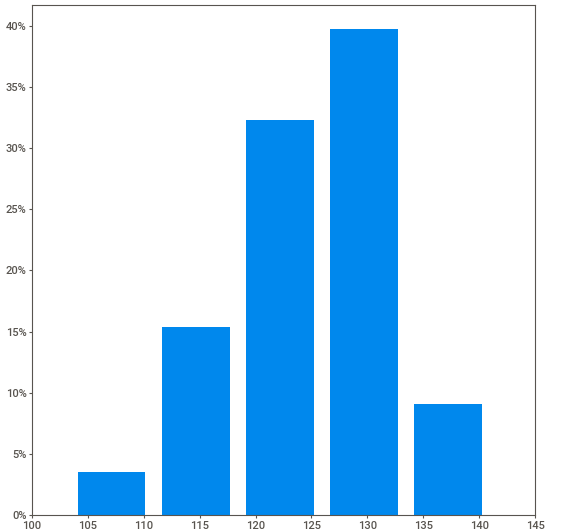
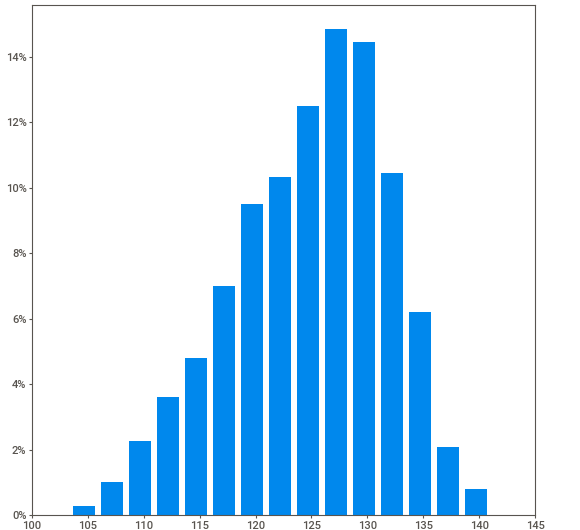
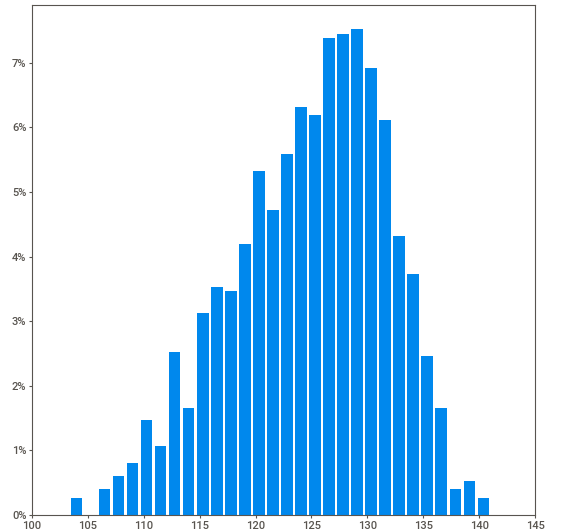
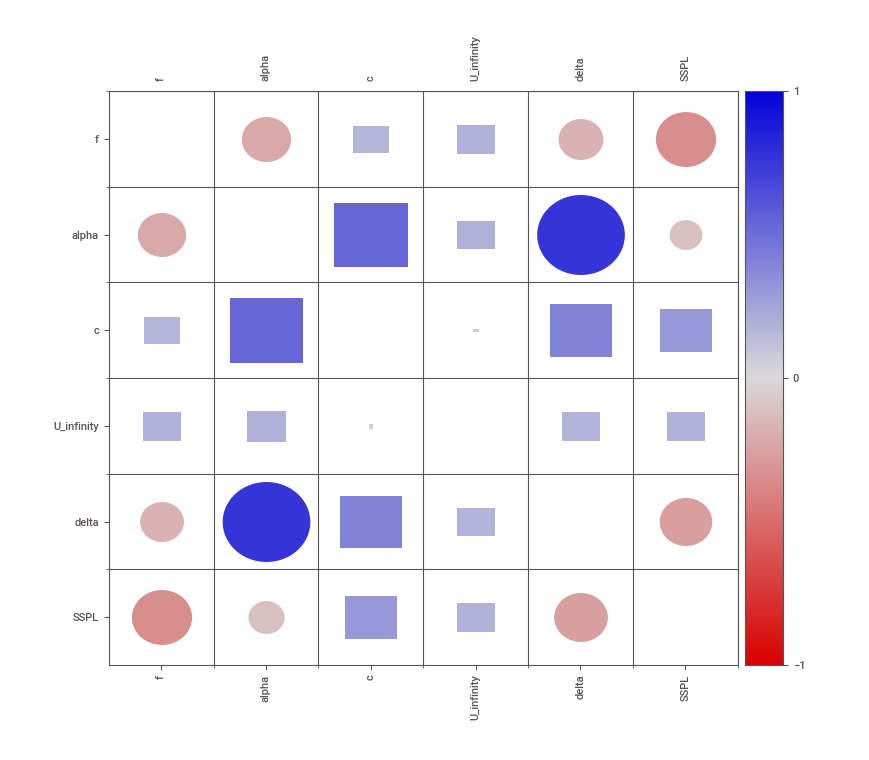
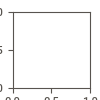

In [5]:
import sweetviz as sv
profile = sv.analyze(data)
profile.show_notebook()

In [6]:
# Here we have to predict the value of SSPL
X = data.drop(['SSPL'],axis=1)
Y = data['SSPL']

In [7]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.8/410.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.2/398.2 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='SSPL', problem_type='regression', eval_metric='mean_squared_error')
autogluon_automl.fit(train_data=data, time_limit=7*60)

No path specified. Models will be saved in: "AutogluonModels/ag-20220816_155815/"
Beginning AutoGluon training ... Time limit = 420s
AutoGluon will save models to "AutogluonModels/ag-20220816_155815/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    1503
Train Data Columns: 5
Label Column: SSPL
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    17862.84 MB
	Train Data (Original)  Memory Usage: 0.06 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dt

[1000]	valid_set's l2: 3.53337
[2000]	valid_set's l2: 3.05544
[3000]	valid_set's l2: 2.92648
[4000]	valid_set's l2: 2.81825
[5000]	valid_set's l2: 2.76155
[6000]	valid_set's l2: 2.71446
[7000]	valid_set's l2: 2.67106
[8000]	valid_set's l2: 2.6538
[9000]	valid_set's l2: 2.63144
[10000]	valid_set's l2: 2.61594


	-2.6145	 = Validation score   (-mean_squared_error)
	4.93s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 413.49s of the 413.49s of remaining time.


[1000]	valid_set's l2: 2.63886
[2000]	valid_set's l2: 2.57319


	-2.5607	 = Validation score   (-mean_squared_error)
	1.97s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 411.19s of the 411.18s of remaining time.
	-3.1657	 = Validation score   (-mean_squared_error)
	0.83s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 410.17s of the 410.17s of remaining time.
	-1.6213	 = Validation score   (-mean_squared_error)
	70.22s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 339.91s of the 339.9s of remaining time.
	-2.7042	 = Validation score   (-mean_squared_error)
	0.61s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 339.13s of the 339.12s of remaining time.
	-4.8318	 = Validation score   (-mean_squared_error)
	3.14s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ... Training model for up

[1000]	valid_set's l2: 2.55494


	-2.5459	 = Validation score   (-mean_squared_error)
	3.04s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 323.27s of remaining time.
	-1.4824	 = Validation score   (-mean_squared_error)
	0.24s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 96.99s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220816_155815/")


In [9]:
autogluon_automl.leaderboard()

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -1.482412       0.036269  81.178880                0.000417           0.236803            2       True         12
1              CatBoost  -1.621282       0.007423  70.223058                0.007423          70.223058            1       True          6
2         LightGBMLarge  -2.545897       0.030303   3.035520                0.030303           3.035520            1       True         11
3              LightGBM  -2.560683       0.044697   1.967766                0.044697           1.967766            1       True          4
4            LightGBMXT  -2.614524       0.194460   4.928988                0.194460           4.928988            1       True          3
5         ExtraTreesMSE  -2.704202       0.102966   0.606194                0.102966           0.606194            1       True          7
6               XGBoost  -2

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.482412,0.036269,81.178880,0.000417,0.236803,2,True,12
1,CatBoost,-1.621282,0.007423,70.223058,0.007423,70.223058,1,True,6
2,LightGBMLarge,-2.545897,0.030303,3.035520,0.030303,3.035520,1,True,11
3,LightGBM,-2.560683,0.044697,1.967766,0.044697,1.967766,1,True,4
4,LightGBMXT,-2.614524,0.194460,4.928988,0.194460,4.928988,1,True,3
5,ExtraTreesMSE,-2.704202,0.102966,0.606194,0.102966,0.606194,1,True,7
6,XGBoost,-2.786227,0.014450,1.614916,0.014450,1.614916,1,True,9
7,RandomForestMSE,-3.165689,0.103731,0.829453,0.103731,0.829453,1,True,5
8,NeuralNetTorch,-3.545048,0.010808,7.576901,0.010808,7.576901,1,True,10
9,NeuralNetFastAI,-4.831790,0.017622,3.142118,0.017622,3.142118,1,True,8


In [10]:
autogluon_automl.evaluate(data)

Evaluation: mean_squared_error on test data: -0.42157730055009585
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_squared_error": -0.42157730055009585,
    "root_mean_squared_error": -0.6492898432519146,
    "mean_absolute_error": -0.374014761005333,
    "r2": 0.9911358476997439,
    "pearsonr": 0.995726801508762,
    "median_absolute_error": -0.23126867675782137
}


{'mean_squared_error': -0.42157730055009585,
 'root_mean_squared_error': -0.6492898432519146,
 'mean_absolute_error': -0.374014761005333,
 'r2': 0.9911358476997439,
 'pearsonr': 0.995726801508762,
 'median_absolute_error': -0.23126867675782137}

<AxesSubplot:>

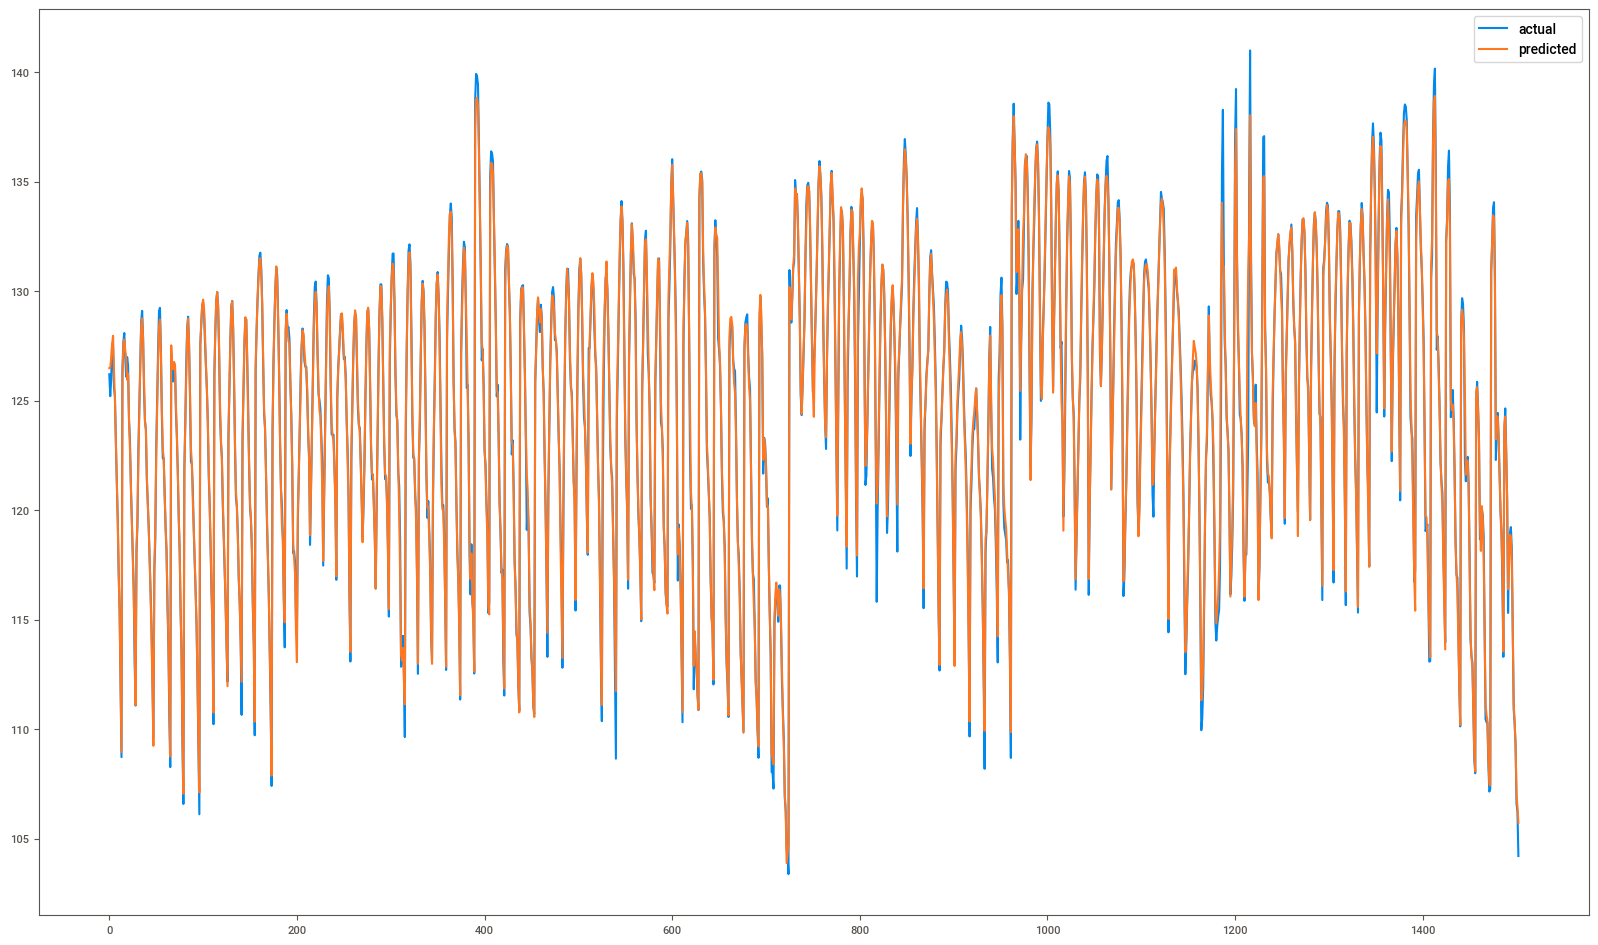

In [11]:
y_pred = autogluon_automl.predict(X)
autogluon_compare = pd.DataFrame(data={'actual': data['SSPL'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(20, 12))

In [12]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-7mf637d4
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-7mf637d4
  Resolved https://github.com/pycaret/pycaret.git to commit f93e7087a671458a20bed6dd3a8bcca891034cfc
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... don

In [13]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'SSPL', session_id=669)

,Description,Value
0,Session id,669
1,Target,SSPL
2,Target type,Regression
3,Data shape,"(1503, 6)"
4,Train data shape,"(1052, 6)"
5,Test data shape,"(451, 6)"
6,Numeric features,5
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [14]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.1244,2.6061,1.6017,0.9431,0.0128,0.0090,0.5450
et,Extra Trees Regressor,1.1428,2.7542,1.6452,0.9401,0.0132,0.0092,0.1570
xgboost,Extreme Gradient Boosting,1.2140,3.1504,1.7577,0.9312,0.0140,0.0098,12.5020
lightgbm,Light Gradient Boosting Machine,1.4153,3.8418,1.9428,0.9159,0.0155,0.0114,0.1690
rf,Random Forest Regressor,1.4305,4.0248,1.9870,0.9126,0.0158,0.0115,0.1850
gbr,Gradient Boosting Regressor,2.0476,7.2312,2.6760,0.8406,0.0211,0.0163,0.0470
dt,Decision Tree Regressor,1.9992,7.6957,2.7535,0.8319,0.0220,0.0161,0.0220
ada,AdaBoost Regressor,3.0898,14.5567,3.8080,0.6778,0.0304,0.0248,0.0570
lar,Least Angle Regression,3.6644,22.2578,4.7147,0.5041,0.0375,0.0294,0.0200
lr,Linear Regression,3.6644,22.2578,4.7147,0.5041,0.0375,0.0294,0.4520


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [15]:
print(pycaret_models)

In [16]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
from catboost import Pool, CatBoostRegressor
model_2 = CatBoostRegressor(random_state=669)
model_2.fit(X,Y)
model_2.score(X,Y)

Learning rate set to 0.043666
0:	learn: 6.7486537	total: 707us	remaining: 707ms
1:	learn: 6.6109144	total: 1.28ms	remaining: 639ms
2:	learn: 6.4609222	total: 1.78ms	remaining: 592ms
3:	learn: 6.3288448	total: 2.52ms	remaining: 627ms
4:	learn: 6.2019580	total: 3.17ms	remaining: 630ms
5:	learn: 6.0752078	total: 3.8ms	remaining: 630ms
6:	learn: 5.9474935	total: 4.48ms	remaining: 635ms
7:	learn: 5.8371482	total: 5.1ms	remaining: 632ms
8:	learn: 5.7332941	total: 5.76ms	remaining: 634ms
9:	learn: 5.6180953	total: 6.36ms	remaining: 630ms
10:	learn: 5.5315480	total: 7.04ms	remaining: 633ms
11:	learn: 5.4342517	total: 7.73ms	remaining: 637ms
12:	learn: 5.3315123	total: 8.36ms	remaining: 634ms
13:	learn: 5.2318367	total: 9.07ms	remaining: 639ms
14:	learn: 5.1319052	total: 9.74ms	remaining: 640ms
15:	learn: 5.0392101	total: 10.4ms	remaining: 642ms
16:	learn: 4.9497464	total: 11.1ms	remaining: 642ms
17:	learn: 4.8716206	total: 11.8ms	remaining: 642ms
18:	learn: 4.7813934	total: 12.5ms	remaining: 6

0.9846259471843786

In [18]:
from tpot import TPOTRegressor

tpot_automl = TPOTRegressor(generations=10, population_size=10, 
                            verbosity=2, scoring='neg_mean_squared_error',   
                            max_time_mins=10, random_state = 669)

In [19]:
tpot_automl.fit(X, Y)

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -11.498848632320065

Generation 2 - Current best internal CV score: -11.122696378059501

Generation 3 - Current best internal CV score: -10.767935258157207

Generation 4 - Current best internal CV score: -10.767935258157207

Generation 5 - Current best internal CV score: -10.767935258157207

Generation 6 - Current best internal CV score: -7.874534887858634

Generation 7 - Current best internal CV score: -7.874534887858634

Generation 8 - Current best internal CV score: -7.874534887858634

Generation 9 - Current best internal CV score: -7.292755080190082

Generation 10 - Current best internal CV score: -7.292755080190082

Best pipeline: GradientBoostingRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), alpha=0.9, learning_rate=0.1, loss=ls, max_depth=9, max_features=0.9000000000000001, min_samples_leaf=3, min_samples_split=17, n_estimators=100, subsample=0.5)


TPOTRegressor(generations=10, max_time_mins=10, population_size=10,
              random_state=669, scoring='neg_mean_squared_error', verbosity=2)

In [20]:
tpot_automl.score(X,Y)

-0.34343328992218375

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
model = GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, max_depth=9, max_features=0.9000000000000001, min_samples_leaf=3, min_samples_split=17, subsample=0.5)

In [22]:
model.fit(X,Y)
model.score(X,Y)

0.9822204318338508

<AxesSubplot:>

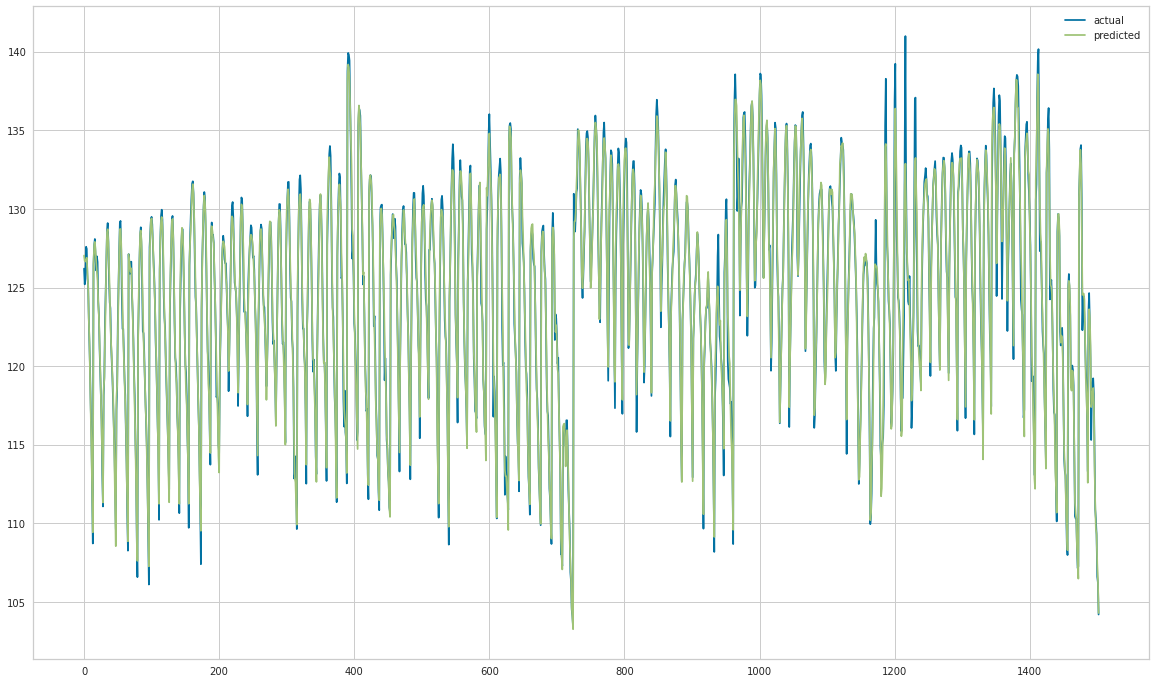

In [23]:
y_pred = model.predict(X)
model_compare = pd.DataFrame(data={'actual': data['SSPL'], 'predicted': y_pred})
model_compare.plot(figsize=(20, 12))